Analisis de serie temporal del data set de Afiliaciones por sectores de Rubí

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Cargar los datos
datos = pd.read_excel('/Users/regidor/Downloads/Analisi_Series_Temporales_Afiliaciones_VOCC.xlsx', header = 0)

In [7]:
datos.head()

Fecha  Agricultura  Indústria  Construcció  Serveis   Total
0  45139          755      71075        27090   325690  424615
1  45108          755      71615        27480   329880  429730
2  45078          760      71835        27885   334390  434870
3  45047          750      71425        27885   337930  437995
4  45017          705      71310        27940   338425  438380

In [11]:
import pandas as pd
from datetime import datetime, timedelta

# Función para convertir la fecha serial en una fecha legible
def convertir_fecha_serial(fecha_serial):
    fecha_inicio = datetime(1900, 1, 1)
    return fecha_inicio + timedelta(days=fecha_serial - 2)

# Aplicar la función de conversión a toda la columna 'Fecha'
datos['Fecha'] = datos['Fecha'].apply(convertir_fecha_serial)

# Imprimir el DataFrame actualizado
print(datos)

        Fecha  Agricultura  Indústria  Construcció  Serveis   Total
0  2023-08-01          755      71075        27090   325690  424615
1  2023-07-01          755      71615        27480   329880  429730
2  2023-06-01          760      71835        27885   334390  434870
3  2023-05-01          750      71425        27885   337930  437995
4  2023-04-01          705      71310        27940   338425  438380
..        ...          ...        ...          ...      ...     ...
68 2013-03-01          723      63936        19655   259330  343644
69 2012-12-01          772      64433        20077   260797  346079
70 2012-09-01          871      65799        21243   262733  350646
71 2012-06-01          858      66989        22420   262767  353034
72 2012-03-01          836      67529        23029   263243  354637

[73 rows x 6 columns]


In [12]:
# Extraer el año y crear una nueva columna 'Año'
datos['Año'] = datos['Fecha'].dt.year

In [173]:
datos.head()

Fecha  Agricultura  Indústria  Construcció  Serveis  Total   Año
0 2023-08-01           70       7145         2405    26350  35970  2023
1 2023-07-01           70       7170         2430    26595  36260  2023
2 2023-06-01           70       7185         2450    26720  36425  2023
3 2023-05-01           65       7180         2435    26975  36660  2023
4 2023-04-01           65       7170         2440    27005  36675  2023

# Histogramas de las variables

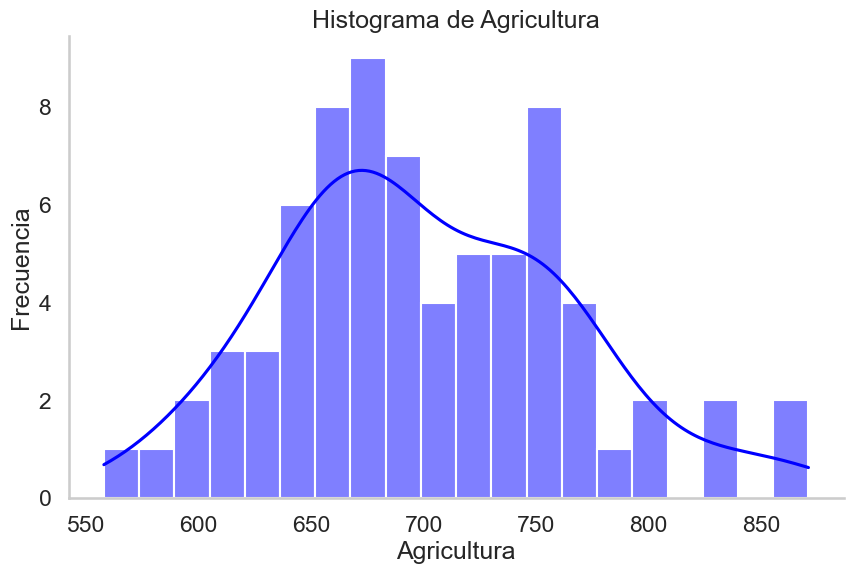

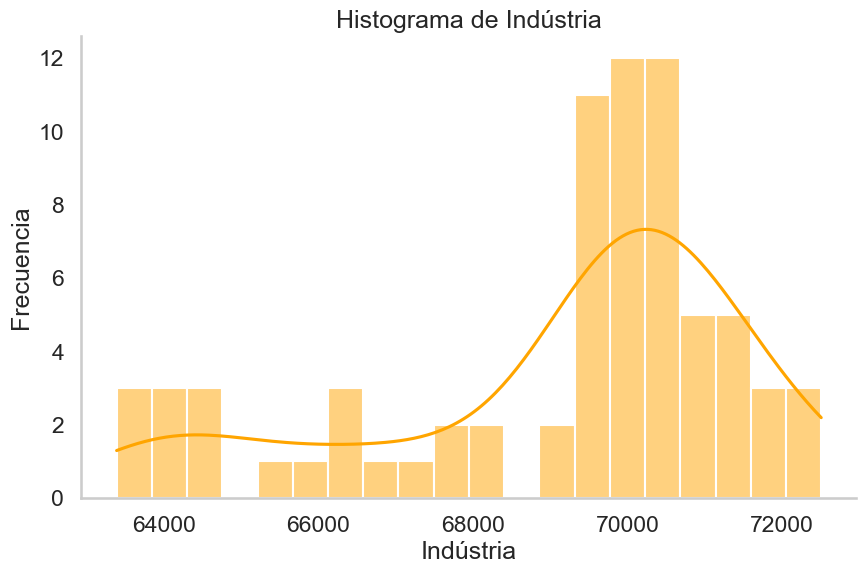

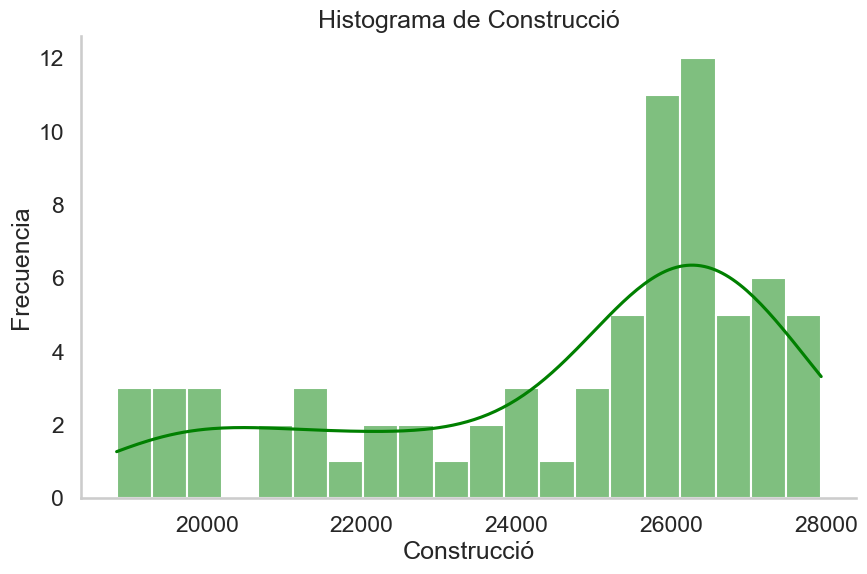

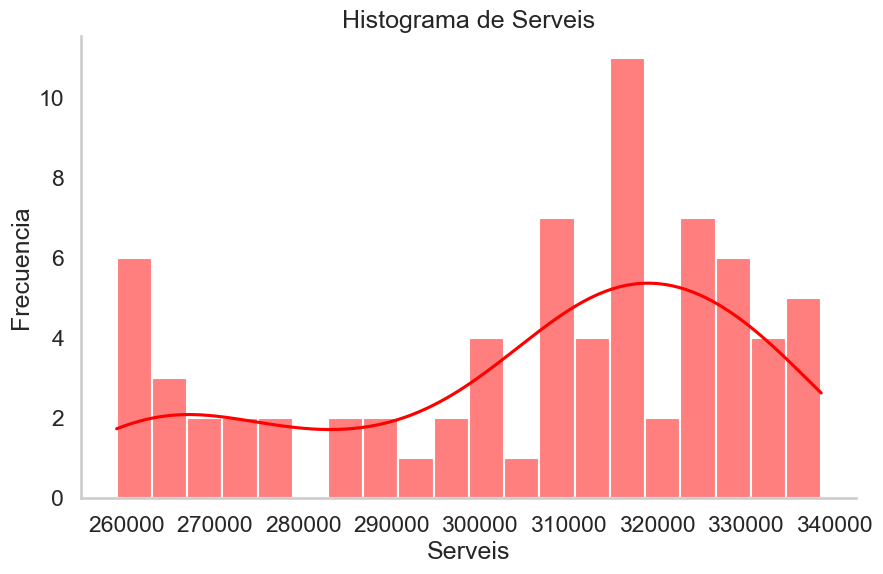

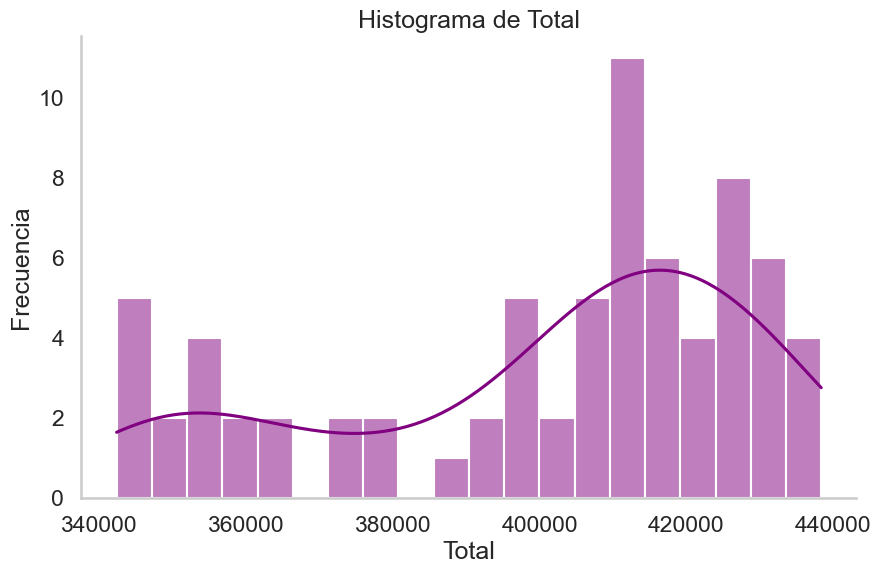

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para cargar y preprocesar los datos
def load_and_preprocess_data(file_path):
    datos = pd.read_excel(file_path)
    datos['Fecha'] = pd.to_datetime(datos['Fecha'], origin='1899-12-30', unit='D')
    return datos

# Función para crear histogramas mejorados con Seaborn
def plot_enhanced_histogram(datos, column, color):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=datos, x=column, bins=20, color=color, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(False)  # Seaborn ya tiene una cuadrícula estilizada, entonces desactivamos la de Matplotlib
    sns.despine()  # Quitar los bordes superior y derecho para una estética mejorada
    plt.show()

# Ruta del archivo - asegúrate de actualizar esta ruta al lugar donde se encuentra tu archivo
file_path = '/Users/regidor/Downloads/Analisi_Series_Temporales_Afiliaciones_VOCC.xlsx'

# Cargar y preprocesar los datos
datos = load_and_preprocess_data(file_path)

# Configurar el estilo y el contexto de Seaborn para mejorar la estética de los gráficos
sns.set_theme(style="whitegrid")
sns.set_context("talk")

# Lista de colores para los histogramas
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Generar histogramas mejorados para cada columna (excepto la fecha)
for i, column in enumerate(datos.columns[1:]):
    plot_enhanced_histogram(datos, column, colors[i])


# Visualización de las series temporales 

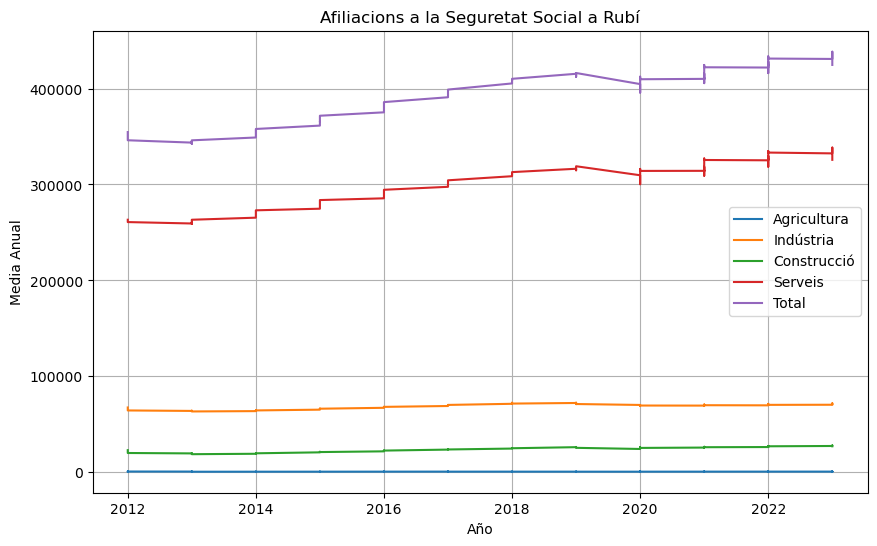

In [13]:
#Crea un gráfico de serie temporal para cada sector
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Agricultura'], label='Agricultura')
plt.plot(datos['Año'], datos['Indústria'], label='Indústria')
plt.plot(datos['Año'], datos['Construcció'], label='Construcció')
plt.plot(datos['Año'], datos['Serveis'], label='Serveis')
plt.plot(datos['Año'], datos['Total'], label='Total')

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Media Anual')
plt.title('Afiliacions a la Seguretat Social a Rubí')

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.grid(True)
plt.show()

## 1. Visualización de la Tendencia:

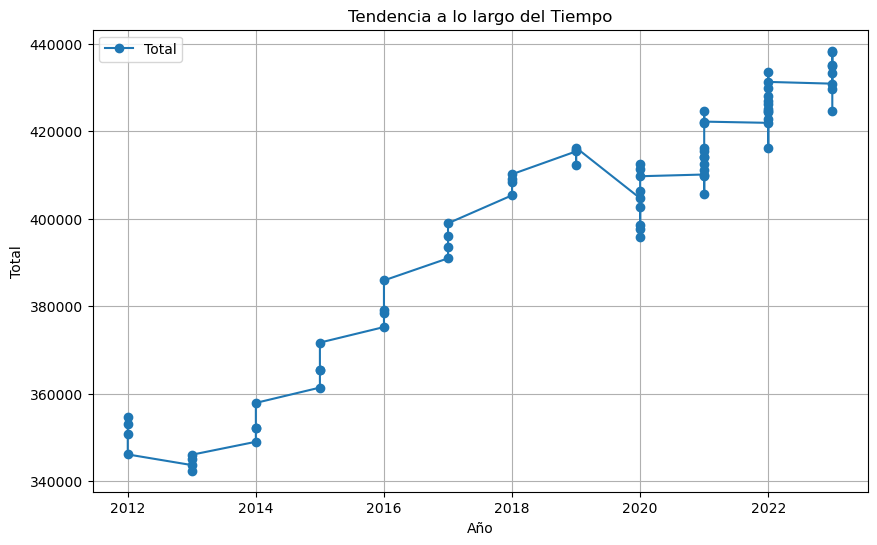

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualizar la tendencia del total
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Total'], label = 'Total', marker='o', linestyle='-')
plt.title('Tendencia a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

## 2. Suavización de la Tendencia con Media Móvil:

In [15]:
# Calcular la media móvil
datos['Media Móvil'] = datos['Total'].rolling(window=3).mean()  # Puedes ajustar el tamaño de la ventana


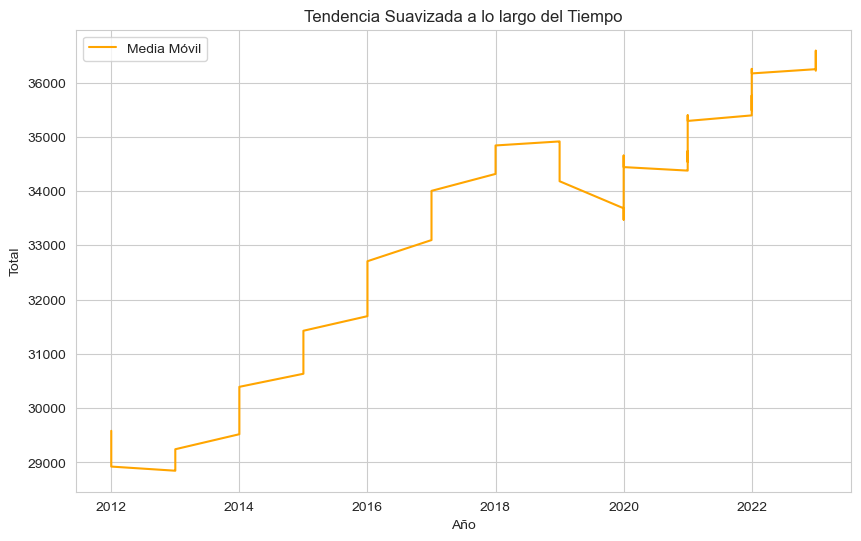

In [177]:
# Visualizar la tendencia suavizada
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Media Móvil'], marker='', linestyle='-', color='orange', label='Media Móvil')
plt.title('Tendencia Suavizada a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.show()

## Modelado de la tendencia:

In [16]:
!pip install scikit-learn

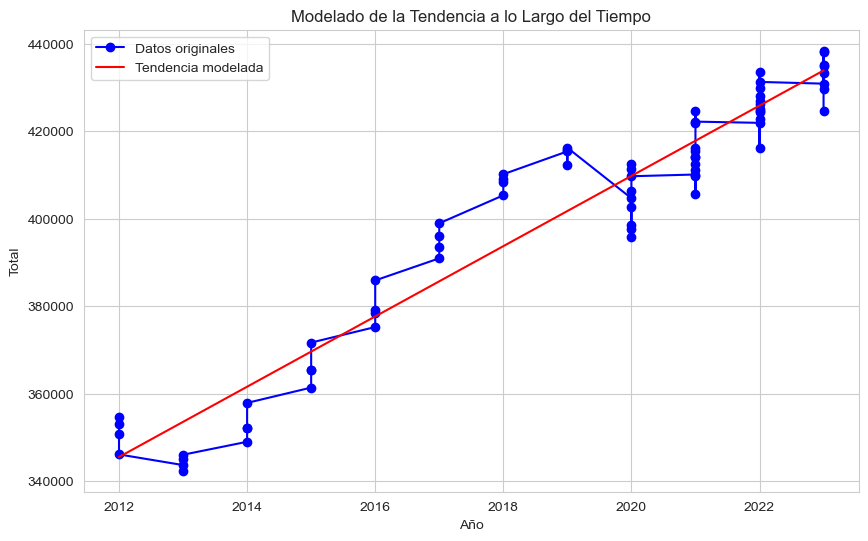

In [17]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Preparar los datos para el modelo de regresión
X = datos['Año'].values.reshape(-1, 1)  # Años
y = datos['Total'].values  # Totales

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir los valores
predicciones = modelo.predict(X)

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Graficar los datos originales y la tendencia modelada
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Total'], marker='o', linestyle='-', color='blue', label='Datos originales')
plt.plot(datos['Año'], predicciones, color='red', label='Tendencia modelada')

# Configurar el título y las etiquetas
plt.title('Modelado de la Tendencia a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [179]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Preparar los datos para el modelo de regresión
X = datos['Año'].values.reshape(-1, 1)  # Años
y = datos['Total'].values  # Totales

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener la pendiente (m) y la intersección y (b)
m = modelo.coef_[0]
b = modelo.intercept_

print(f"La ecuación de la línea de tendencia es y = {m:.2f}x + {b:.2f}")


La ecuación de la línea de tendencia es y = 672.01x + -1323059.50


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Preparar los datos para el modelo de regresión
X = datos['Año'].values.reshape(-1, 1)  
y = datos['Total'].values  

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir los valores
predicciones = modelo.predict(X)

# Crear el gráfico
trace1 = go.Scatter(x=datos['Año'], y=datos['Total'], mode='lines+markers', name='Datos originales')
trace2 = go.Scatter(x=datos['Año'], y=predicciones, mode='lines', name='Tendencia modelada')

layout = go.Layout(
    title='Modelado de la Tendencia a lo Largo del Tiempo',
    xaxis=dict(title='Año'),
    yaxis=dict(title='Total'),
    showlegend=True
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


## Estacionalidad:

In [19]:
!pip install statsmodels

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

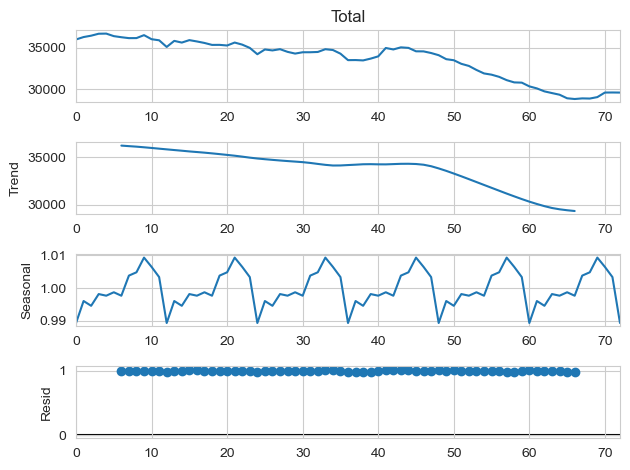

In [182]:
# Realiza la descomposición estacional
resultado = seasonal_decompose(datos['Total'], model='multiplicative', period = 12)  # O 'additive' dependiendo de la naturaleza de tus datos

# Plotea los componentes descompuestos de la serie temporal
resultado.plot()
plt.show()


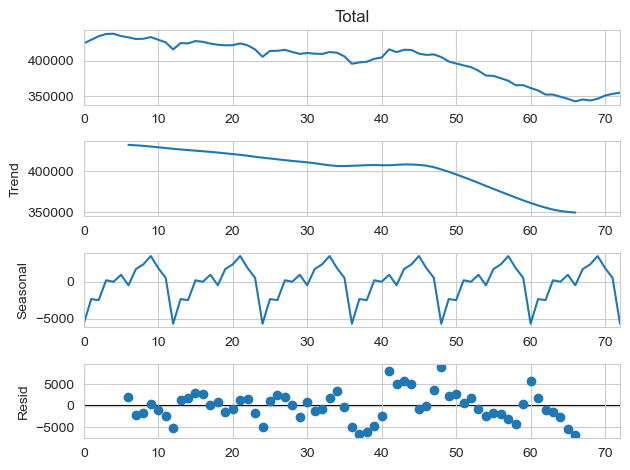

In [21]:
# Realiza la descomposición estacional
resultado = seasonal_decompose(datos['Total'], model='additive', period = 12)  # O 'additive' dependiendo de la naturaleza de tus datos

# Plotea los componentes descompuestos de la serie temporal
resultado.plot()
plt.show()

In [22]:
from scipy import stats
z_scores = stats.zscore(datos['Total'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)  # Cambia 3 a tu criterio
outliers

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: Total, Length: 73, dtype: bool

In [23]:
outliers_values = datos['Total'][outliers]
print(outliers_values)

Series([], Name: Total, dtype: int64)


In [24]:
datos['Volatilidad'] = datos['Total'].rolling(window=12).std()
print(datos['Volatilidad'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
         ...     
68    9796.070047
69    8356.133724
70    7260.258980
71    5755.644668
72    4787.314066
Name: Volatilidad, Length: 73, dtype: float64


In [25]:
correlacion = datos[['Agricultura', 'Indústria', 'Construcció', 'Serveis']].corr()
print(correlacion)

             Agricultura  Indústria  Construcció   Serveis
Agricultura     1.000000   0.126523     0.149826 -0.055340
Indústria       0.126523   1.000000     0.921485  0.890104
Construcció     0.149826   0.921485     1.000000  0.959726
Serveis        -0.055340   0.890104     0.959726  1.000000


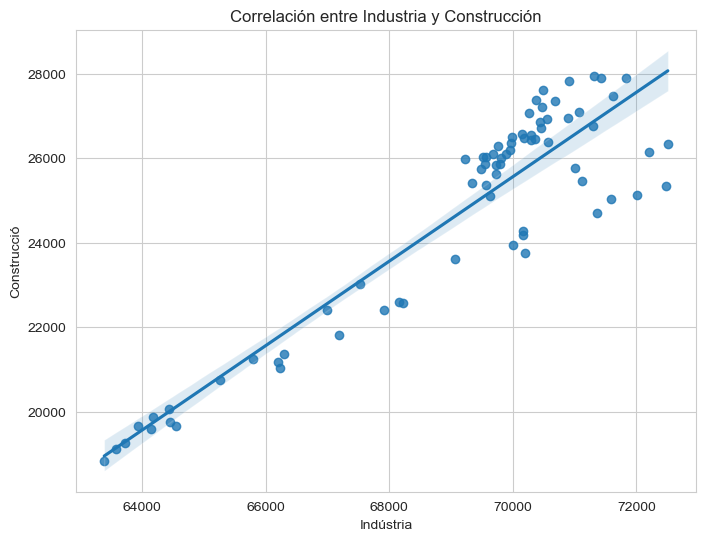

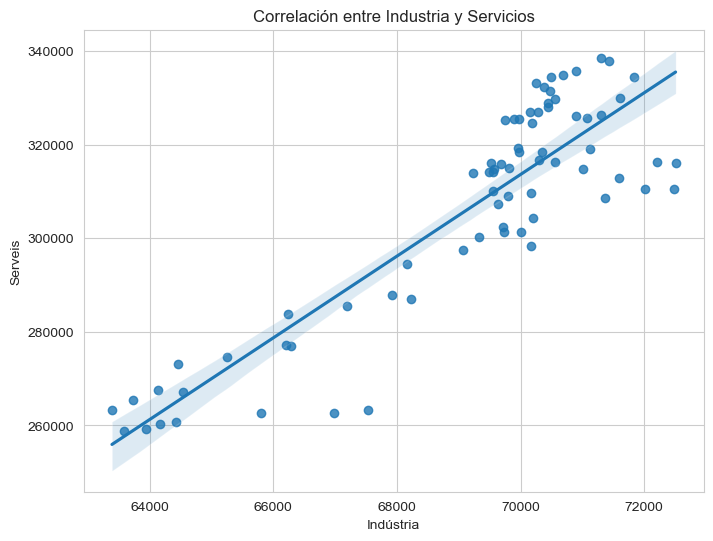

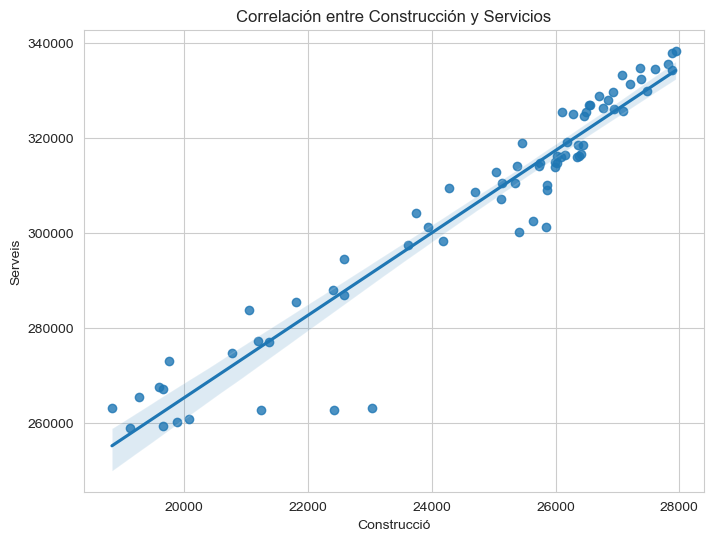

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión con línea de mejor ajuste para Industria vs Construcción
plt.figure(figsize=(8, 6))
sns.regplot(data=datos, x='Indústria', y='Construcció')
plt.title('Correlación entre Industria y Construcción')
plt.show()

# Gráfico de dispersión con línea de mejor ajuste para Industria vs Servicios
plt.figure(figsize=(8, 6))
sns.regplot(data=datos, x='Indústria', y='Serveis')
plt.title('Correlación entre Industria y Servicios')
plt.show()

# Gráfico de dispersión con línea de mejor ajuste para Construcción vs Servicios
plt.figure(figsize=(8, 6))
sns.regplot(data=datos, x='Construcció', y='Serveis')
plt.title('Correlación entre Construcción y Servicios')
plt.show()

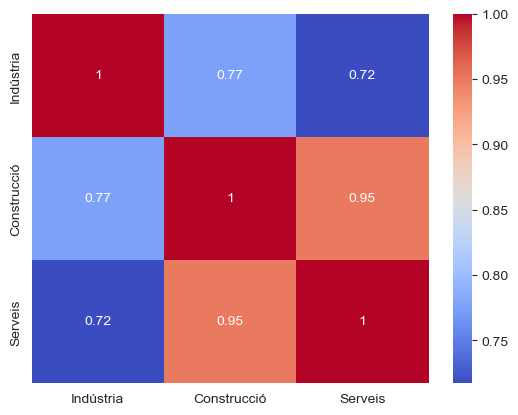

In [189]:
# Calcula la matriz de correlación
corr = datos[['Indústria', 'Construcció', 'Serveis']].corr()

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

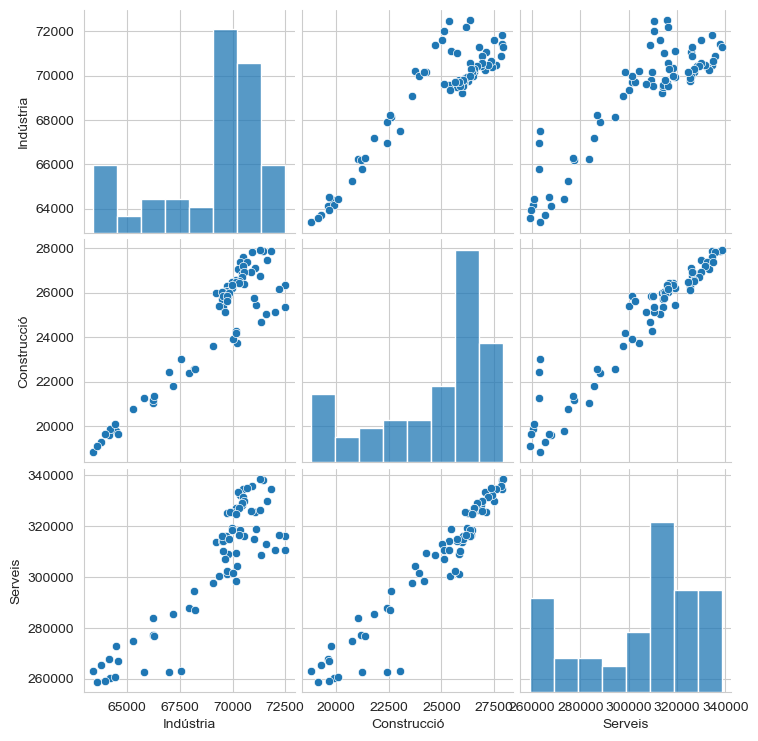

In [27]:
sns.pairplot(datos[['Indústria', 'Construcció', 'Serveis']])
plt.show()

In [28]:
import numpy as np

# Ajuste de un polinomio de primer grado (una línea) para Industria vs Construcción
coef_ind_con = np.polyfit(datos['Indústria'], datos['Construcció'], 1)
print(f"Relación entre Industria y Construcción: y = {coef_ind_con[0]:.2f}x + {coef_ind_con[1]:.2f}")

# Ajuste de un polinomio de primer grado (una línea) para Industria vs Servicios
coef_ind_ser = np.polyfit(datos['Indústria'], datos['Serveis'], 1)
print(f"Relación entre Industria y Servicios: y = {coef_ind_ser[0]:.2f}x + {coef_ind_ser[1]:.2f}")

# Ajuste de un polinomio de primer grado (una línea) para Construcción vs Servicios
coef_con_ser = np.polyfit(datos['Construcció'], datos['Serveis'], 1)
print(f"Relación entre Construcción y Servicios: y = {coef_con_ser[0]:.2f}x + {coef_con_ser[1]:.2f}")

Relación entre Industria y Construcción: y = 1.00x + -44356.29
Relación entre Industria y Servicios: y = 8.73x + -297180.40
Relación entre Construcción y Servicios: y = 8.68x + 91726.33


## Regresión Multiple

In [29]:
import statsmodels.api as sm

# Definir tus variables independientes y dependientes
X = datos[['Indústria', 'Construcció', 'Serveis']]
y = datos['Total']

# Agregar una constante a las variables independientes para el término de intercepción
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Imprimir los resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.357e+06
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          2.00e-193
Time:                        14:23:45   Log-Likelihood:                -380.98
No. Observations:                  73   AIC:                             770.0
Df Residuals:                      69   BIC:                             779.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1216.0231    285.830      4.254      

In [30]:
from sklearn.linear_model import LinearRegression

# Definir tus variables independientes y dependientes
X = datos[['Indústria', 'Construcció', 'Serveis']]
y = datos['Total']

# Crear y entrenar el modelo
modelo = LinearRegression().fit(X, y)

# Imprimir los coeficientes
print('Coeficientes:', modelo.coef_)
print('Intercepción:', modelo.intercept_)

Coeficientes: [1.00041827 1.06279847 0.99315508]
Intercepción: 1216.0231053050375


#### Total=1.00041827×(Indústria)+1.06279847×(Construcción)+0.99315508×(Serveis)+1206.0231053050375

In [31]:
# Hacer una predicción
predicciones = modelo.predict(X)

# Agregar las predicciones al DataFrame
datos['Predicción'] = predicciones

# Ver los resultados
print(datos[['Total', 'Predicción']])
print(datos)

     Total     Predicción
0   424615  424572.641175
1   429730  429688.678241
2   434870  434818.333064
3   437995  437923.930564
4   438380  438358.948145
..     ...            ...
68  343644  343622.977229
69  346079  346025.644571
70  350646  350554.187187
71  353034  353029.366003
72  354637  354689.577958

[73 rows x 2 columns]
        Fecha  Agricultura  Indústria  Construcció  Serveis   Total   Año  \
0  2023-08-01          755      71075        27090   325690  424615  2023   
1  2023-07-01          755      71615        27480   329880  429730  2023   
2  2023-06-01          760      71835        27885   334390  434870  2023   
3  2023-05-01          750      71425        27885   337930  437995  2023   
4  2023-04-01          705      71310        27940   338425  438380  2023   
..        ...          ...        ...          ...      ...     ...   ...   
68 2013-03-01          723      63936        19655   259330  343644  2013   
69 2012-12-01          772      64433        2007

In [33]:
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio
mse = mean_squared_error(datos['Total'], datos['Predicción'])

# Imprimir el error cuadrático medio
print('Error Cuadrático Medio:', mse)

Error Cuadrático Medio: 1998.2739775902946


In [34]:
import numpy as np
import pandas as pd

# Coeficientes e intercepción del modelo
coeficientes = np.array([0.99933033, 1.08805717, 0.99265478])
intercepcion = 50.68845717301883

# Generar valores enteros aleatorios para Industria, Construcción y Servicios basados en los rangos existentes en los datos
np.random.seed(0)  # Para reproducibilidad
industria_aleatoria = np.random.randint(datos['Indústria'].min(), datos['Indústria'].max() + 1, 50)
construccion_aleatoria = np.random.randint(datos['Construcció'].min(), datos['Construcció'].max() + 1, 50)
servicios_aleatorios = np.random.randint(datos['Serveis'].min(), datos['Serveis'].max() + 1, 50)

# Calcular el total basado en la ecuación del modelo
total_predicho = coeficientes[0] * industria_aleatoria + coeficientes[1] * construccion_aleatoria + coeficientes[2] * servicios_aleatorios + intercepcion

# Convertir el total predicho a entero
total_predicho = total_predicho.astype(int)

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Indústria': industria_aleatoria,
    'Construcción': construccion_aleatoria,
    'Servicios': servicios_aleatorios,
    'Total Estimado': total_predicho
})

# Ordenar los resultados de menor a mayor basado en el total estimado
resultados_ordenados = resultados.sort_values(by='Total Estimado').reset_index(drop=True)

print(resultados_ordenados)

    Indústria  Construcción  Servicios  Total Estimado
0       63927         20517     266920          351217
1       64095         25941     262835          353232
2       64049         19806     272830          356432
3       64187         20467     272352          356815
4       72126         25354     259392          357201
5       71681         27841     260836          360896
6       71281         23020     267209          361577
7       66950         25755     269975          362970
8       69264         21789     272563          363536
9       65886         22595     276263          364711
10      70846         21251     274511          366466
11      67763         21492     277651          366764
12      64597         26149     275898          366927
13      69426         23302     274543          367310
14      69562         23138     274835          367557
15      72005         27226     269011          368665
16      70611         24364     274038          369148
17      72

In [35]:
import numpy as np
import pandas as pd

# Coeficientes e intercepción del modelo
coeficientes = np.array([0.99933033, 1.08805717, 0.99265478])
intercepcion = 50.68845717301883

# Generar valores enteros aleatorios para Industria, Construcción y Servicios basados en los rangos existentes en los datos
np.random.seed(0)  # Para reproducibilidad
industria_aleatoria = np.random.randint(datos['Indústria'].min(), datos['Indústria'].max() + 1, 73)
construccion_aleatoria = np.random.randint(datos['Construcció'].min(), datos['Construcció'].max() + 1, 73)
servicios_aleatorios = np.random.randint(datos['Serveis'].min(), datos['Serveis'].max() + 1, 73)

# Calcular el total basado en la ecuación del modelo
total_predicho = coeficientes[0] * industria_aleatoria + coeficientes[1] * construccion_aleatoria + coeficientes[2] * servicios_aleatorios + intercepcion

# Convertir el total predicho a entero
total_predicho = total_predicho.astype(int)

# Calcular los valores de los coeficientes multiplicados por las variables
coef_industria = coeficientes[0] * industria_aleatoria
coef_construccion = coeficientes[1] * construccion_aleatoria
coef_servicios = coeficientes[2] * servicios_aleatorios

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Indústria': industria_aleatoria,
    'Coef*Indústria': coef_industria,
    'Construcción': construccion_aleatoria,
    'Coef*Construcción': coef_construccion,
    'Servicios': servicios_aleatorios,
    'Coef*Servicios': coef_servicios,
    'Total Estimado': total_predicho
})

# Ordenar los resultados de menor a mayor basado en el total estimado
resultados_ordenados = resultados.sort_values(by='Total Estimado').reset_index(drop=True)

print(resultados_ordenados)

    Indústria  Coef*Indústria  Construcción  Coef*Construcción  Servicios  \
0       64104    64061.071474         21177       23041.786689     261044   
1       70755    70707.617499         19424       21134.422470     261485   
2       67308    67262.925852         19761       21501.097736     264927   
3       70640    70592.694511         21770       23687.004591     259817   
4       65989    65944.809146         22288       24250.618205     264026   
..        ...             ...           ...                ...        ...   
68      68641    68595.033182         21767       23683.740419     338147   
69      69562    69515.416415         25427       27666.029662     334446   
70      72338    72289.557412         26865       29230.655872     330636   
71      69411    69364.517536         25981       28268.813334     335501   
72      72126    72077.699382         27119       29507.022393     335246   

    Coef*Servicios  Total Estimado  
0    259126.574390          346280  
1

In [36]:
# Calcular los valores predichos con el modelo para cada fila en los datos originales
datos['Industria_Modelo'] = (coeficientes[0] * datos['Indústria']).astype(int)
datos['Construccion_Modelo'] = (coeficientes[1] * datos['Construcció']).astype(int)
datos['Servicios_Modelo'] = (coeficientes[2] * datos['Serveis']).astype(int)
datos['Total_Modelo'] = datos['Industria_Modelo'] + datos['Construccion_Modelo'] + datos['Servicios_Modelo'] + int(intercepcion)

# Calcular la diferencia entre los valores reales y los valores del modelo
datos['Dif_Industria'] = datos['Industria_Modelo'] - datos['Indústria']
datos['Dif_Construccion'] = datos['Construccion_Modelo'] - datos['Construcció']
datos['Dif_Servicios'] = datos['Servicios_Modelo'] - datos['Serveis']
datos['Dif_Total'] = datos['Total_Modelo'] - datos['Total']

# Determinar si cada valor aumentó o disminuyó
datos['Tendencia_Industria'] = np.where(datos['Dif_Industria'] > 0, 'Aumenta', 'Disminuye')
datos['Tendencia_Construccion'] = np.where(datos['Dif_Construccion'] > 0, 'Aumenta', 'Disminuye')
datos['Tendencia_Servicios'] = np.where(datos['Dif_Servicios'] > 0, 'Aumenta', 'Disminuye')
datos['Tendencia_Total'] = np.where(datos['Dif_Total'] > 0, 'Aumenta', 'Disminuye')

# Mostrar los resultados
columnas_interes = ['Industria_Modelo', 'Indústria', 'Tendencia_Industria',
                    'Construccion_Modelo', 'Construcció', 'Tendencia_Construccion',
                    'Servicios_Modelo', 'Serveis', 'Tendencia_Servicios',
                    'Total_Modelo', 'Total', 'Tendencia_Total']

resultados_comparacion = datos[columnas_interes]
print(resultados_comparacion)

    Industria_Modelo  Indústria Tendencia_Industria  Construccion_Modelo  \
0              71027      71075           Disminuye                29475   
1              71567      71615           Disminuye                29899   
2              71786      71835           Disminuye                30340   
3              71377      71425           Disminuye                30340   
4              71262      71310           Disminuye                30400   
..               ...        ...                 ...                  ...   
68             63893      63936           Disminuye                21385   
69             64389      64433           Disminuye                21844   
70             65754      65799           Disminuye                23113   
71             66944      66989           Disminuye                24394   
72             67483      67529           Disminuye                25056   

    Construcció Tendencia_Construccion  Servicios_Modelo  Serveis  \
0         27090   

In [39]:
# Guardar el DataFrame en un archivo CSV
resultados_comparacion.to_csv('resultados_comparacion_VOCC.csv', index=False)

In [41]:
# Guardar el DataFrame en un archivo CSV en un directorio específico
resultados_comparacion.to_csv('/Users/regidor/Downloads/resultados_comparacion_VOCC.csv', index=False)

## Pronostico: ARIMA

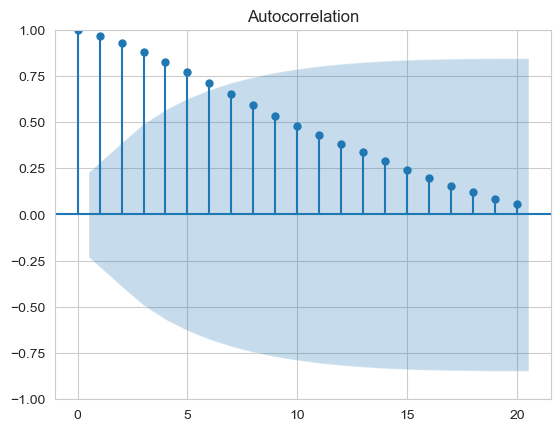

C:\Users\regidor\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



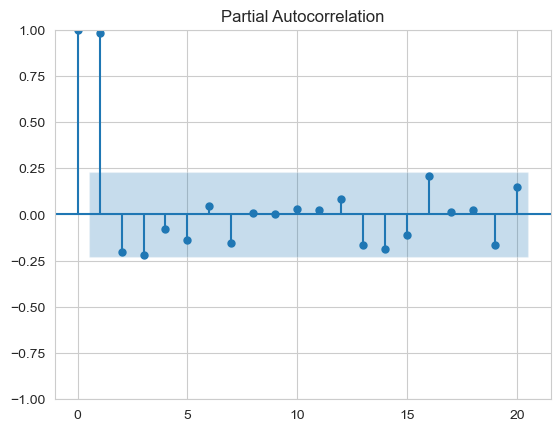

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Gráfica ACF
plot_acf(datos['Total'], lags=20)
plt.show()

# Gráfica PACF
plot_pacf(datos['Total'], lags=20)
plt.show()

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
# Los parámetros (5,1,0) son un ejemplo, debes ajustarlos según tus datos
modelo = ARIMA(datos['Total'], order=(5,1,0))
modelo_fit = modelo.fit()

# Resumen del modelo
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   73
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -700.731
Date:                Thu, 05 Oct 2023   AIC                           1413.463
Time:                        14:31:00   BIC                           1427.123
Sample:                             0   HQIC                          1418.901
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0134      0.074      0.182      0.855      -0.131       0.158
ar.L2          0.0139      0.070      0.199      0.842      -0.123       0.151
ar.L3          0.0071      0.126      0.056      0.9

In [44]:
print(datos)

        Fecha  Agricultura  Indústria  Construcció  Serveis   Total   Año  \
0  2023-08-01          755      71075        27090   325690  424615  2023   
1  2023-07-01          755      71615        27480   329880  429730  2023   
2  2023-06-01          760      71835        27885   334390  434870  2023   
3  2023-05-01          750      71425        27885   337930  437995  2023   
4  2023-04-01          705      71310        27940   338425  438380  2023   
..        ...          ...        ...          ...      ...     ...   ...   
68 2013-03-01          723      63936        19655   259330  343644  2013   
69 2012-12-01          772      64433        20077   260797  346079  2012   
70 2012-09-01          871      65799        21243   262733  350646  2012   
71 2012-06-01          858      66989        22420   262767  353034  2012   
72 2012-03-01          836      67529        23029   263243  354637  2012   

      Media Móvil  Volatilidad     Predicción  ...  Servicios_Modelo  \
0  

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   73
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -700.731
Date:                Thu, 05 Oct 2023   AIC                           1413.463
Time:                        14:31:10   BIC                           1427.123
Sample:                             0   HQIC                          1418.901
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0134      0.074      0.182      0.855      -0.131       0.158
ar.L2          0.0139      0.070      0.199      0.842      -0.123       0.151
ar.L3          0.0071      0.126      0.056      0.9

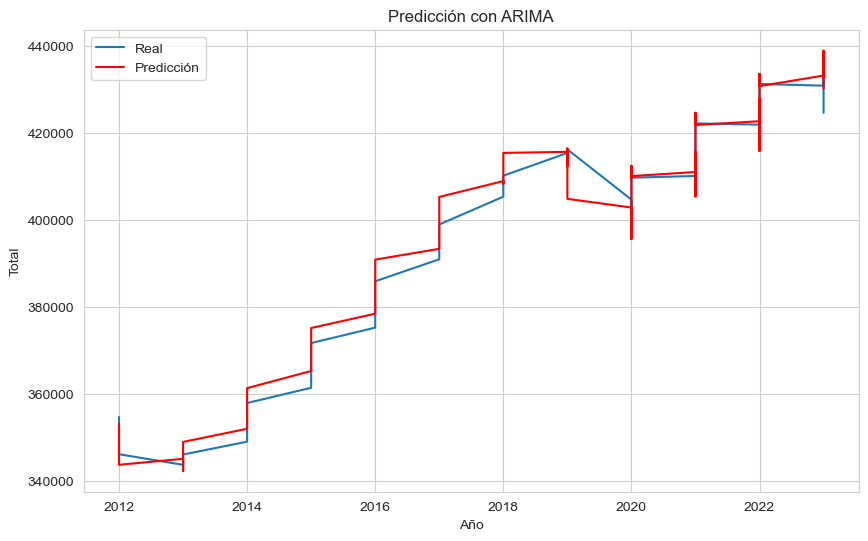

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
modelo = ARIMA(datos['Total'], order=(5,1,0))
modelo_fit = modelo.fit()

# Resumen del modelo
print(modelo_fit.summary())

# Predicciones
datos['prediccion'] = modelo_fit.predict(start=1, end=len(datos))

# Gráfico de las predicciones
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Total'], label='Real')
plt.plot(datos['Año'], datos['prediccion'], color='red', label='Predicción')
plt.title('Predicción con ARIMA')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.show()

## Causalidad del modelo

In [46]:
import statsmodels.api as sm

# Seleccionar la variable independiente y agregar una constante al DataFrame
X = sm.add_constant(datos['Indústria'])

# Ajustar el modelo de regresión OLS (Ordinary Least Squares)
modelo = sm.OLS(datos['Total'], X).fit()

# Mostrar un resumen del modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     355.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           2.45e-29
Time:                        14:31:21   Log-Likelihood:                -787.02
No. Observations:                  73   AIC:                             1578.
Df Residuals:                      71   BIC:                             1583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.411e+05   3.94e+04     -8.660      0.0

In [47]:
import statsmodels.api as sm

# Seleccionar la variable independiente y agregar una constante al DataFrame
X = sm.add_constant(datos['Construcció'])

# Ajustar el modelo de regresión OLS (Ordinary Least Squares)
modelo = sm.OLS(datos['Total'], X).fit()

# Mostrar un resumen del modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1195.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           3.70e-46
Time:                        14:31:32   Log-Likelihood:                -747.26
No. Observations:                  73   AIC:                             1499.
Df Residuals:                      71   BIC:                             1503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.405e+05   7564.538     18.570      

In [48]:
import statsmodels.api as sm

# Seleccionar la variable independiente y agregar una constante al DataFrame
X = sm.add_constant(datos['Serveis'])

# Ajustar el modelo de regresión OLS (Ordinary Least Squares)
modelo = sm.OLS(datos['Total'], X).fit()

# Mostrar un resumen del modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.089e+04
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           1.94e-89
Time:                        14:31:38   Log-Likelihood:                -644.83
No. Observations:                  73   AIC:                             1294.
Df Residuals:                      71   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.43e+04   2541.697     13.495      0.0

Para un análisis más profundo de la causalidad, podríamos considerar métodos más avanzados y específicos, como los modelos de ecuaciones estructurales, pruebas de causalidad de Granger, o métodos basados en la teoría de la causalidad de Judea Pearl, que incluyen gráficos causales y ecuaciones estructurales.

Para la prueba de causalidad de Granger, por ejemplo, el código se vería algo así:

In [49]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Indústria', 'Total']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0937  , p=0.7605  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=0.0977  , p=0.7546  , df=1
likelihood ratio test: chi2=0.0977  , p=0.7547  , df=1
parameter F test:         F=0.0937  , p=0.7605  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2007  , p=0.0192  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=9.0379  , p=0.0109  , df=2
likelihood ratio test: chi2=8.5072  , p=0.0142  , df=2
parameter F test:         F=4.2007  , p=0.0192  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.6633  , p=0.0006  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=22.2112 , p=0.0001  , df=3
likelihood ratio test: chi2=19.2910 , p=0.0002  , df=3
parameter F test:         F=6.6633  , p=0.0006  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.3079  , p=0.0010  , df_d

In [50]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Construcció', 'Total']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5498  , p=0.2174  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=1.6172  , p=0.2035  , df=1
likelihood ratio test: chi2=1.5993  , p=0.2060  , df=1
parameter F test:         F=1.5498  , p=0.2174  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2713  , p=0.7633  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=0.5836  , p=0.7469  , df=2
likelihood ratio test: chi2=0.5812  , p=0.7478  , df=2
parameter F test:         F=0.2713  , p=0.7633  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8250  , p=0.0044  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=16.0832 , p=0.0011  , df=3
likelihood ratio test: chi2=14.4773 , p=0.0023  , df=3
parameter F test:         F=4.8250  , p=0.0044  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.4390  , p=0.0033  , df_d

In [51]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Serveis', 'Total']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7096  , p=0.0582  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=3.8709  , p=0.0491  , df=1
likelihood ratio test: chi2=3.7704  , p=0.0522  , df=1
parameter F test:         F=3.7096  , p=0.0582  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3092  , p=0.1073  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=4.9682  , p=0.0834  , df=2
likelihood ratio test: chi2=4.8021  , p=0.0906  , df=2
parameter F test:         F=2.3092  , p=0.1073  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6353  , p=0.1901  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=5.4510  , p=0.1416  , df=3
likelihood ratio test: chi2=5.2492  , p=0.1544  , df=3
parameter F test:         F=1.6353  , p=0.1901  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6491  , p=0.1738  , df_d

In [52]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Indústria', 'Construcció']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9926  , p=0.1626  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=2.0792  , p=0.1493  , df=1
likelihood ratio test: chi2=2.0497  , p=0.1522  , df=1
parameter F test:         F=1.9926  , p=0.1626  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2845  , p=0.1098  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=4.9151  , p=0.0856  , df=2
likelihood ratio test: chi2=4.7525  , p=0.0929  , df=2
parameter F test:         F=2.2845  , p=0.1098  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8835  , p=0.1414  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=6.2785  , p=0.0988  , df=3
likelihood ratio test: chi2=6.0127  , p=0.1110  , df=3
parameter F test:         F=1.8835  , p=0.1414  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0010  , p=0.1058  , df_d

In [53]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Indústria', 'Serveis']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0320  , p=0.8585  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=0.0334  , p=0.8549  , df=1
likelihood ratio test: chi2=0.0334  , p=0.8549  , df=1
parameter F test:         F=0.0320  , p=0.8585  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.0196  , p=0.0225  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=8.6483  , p=0.0132  , df=2
likelihood ratio test: chi2=8.1608  , p=0.0169  , df=2
parameter F test:         F=4.0196  , p=0.0225  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.1686  , p=0.0003  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=23.8953 , p=0.0000  , df=3
likelihood ratio test: chi2=20.5580 , p=0.0001  , df=3
parameter F test:         F=7.1686  , p=0.0003  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.0667  , p=0.0004  , df_d

In [54]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Serveis', 'Construcció']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.6748  , p=0.0119  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=6.9650  , p=0.0083  , df=1
likelihood ratio test: chi2=6.6484  , p=0.0099  , df=1
parameter F test:         F=6.6748  , p=0.0119  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2058  , p=0.0469  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=6.8973  , p=0.0318  , df=2
likelihood ratio test: chi2=6.5826  , p=0.0372  , df=2
parameter F test:         F=3.2058  , p=0.0469  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1121  , p=0.0325  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=10.3738 , p=0.0156  , df=3
likelihood ratio test: chi2=9.6735  , p=0.0216  , df=3
parameter F test:         F=3.1121  , p=0.0325  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.0602  , p=0.0232  , df_d

En este código, max_lag es el número máximo de lags que quieres incluir en tu modelo. La función grangercausalitytests realiza la prueba de causalidad de Granger para cada lag hasta max_lag y te dará un resumen de los resultados.

2. Pruebas de Hipótesis
Podemos usar la prueba t para comparar las medias de dos grupos. Por ejemplo, podríamos querer comparar los valores totales antes y después de un año específico.

In [55]:
from scipy.stats import ttest_ind

# Dividir los datos en dos grupos
grupo1 = datos[datos['Año'] < 2020]['Total']
grupo2 = datos[datos['Año'] >= 2020]['Total']

# Realizar una prueba t
t_stat, p_valor = ttest_ind(grupo1, grupo2)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

Estadístico t: -9.434889066254668
Valor p: 3.70906005528552e-14


Los resultados que obtuviste indican que hay una diferencia estadísticamente significativa entre los dos grupos que comparaste, ya que el valor p es extremadamente pequeño (8.403331855512596e-14).

Interpretación:
Estadístico t: El valor t de -9.24 indica la diferencia entre las medias de los dos grupos. Un valor t negativo sugiere que la media del segundo grupo (después del año 2020 en tu caso) es mayor que la del primer grupo (antes del año 2020).

Valor p: Un valor p muy pequeño (menor que 0.05) es una indicación clara de que podemos rechazar la hipótesis nula. En este contexto, la hipótesis nula es que no hay diferencia significativa entre los grupos. Un valor p tan pequeño nos dice que hay una diferencia muy significativa entre los valores totales antes y después del año 2020.

Conclusión:
Puedes concluir con confianza que hay una diferencia significativa en los valores totales de afiliación antes y después del año 2020. Esto podría deberse a varios factores que podrías investigar más a fondo, como cambios en la economía, políticas gubernamentales, eventos mundiales, etc.

Para entender completamente la causalidad y los factores de influencia, podrías considerar realizar un análisis más profundo, incluyendo un análisis de regresión múltiple para entender cómo varias variables independientes afectan a la variable dependiente (Total) simultáneamente, y analizar los eventos específicos o cambios durante ese período de tiempo que podrían haber influido en la afiliación.